In [1]:
%matplotlib inline

W = tensor([[-12.4487]], requires_grad=True), b = tensor([[6.0211]], requires_grad=True), loss = tensor(0.0020, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)


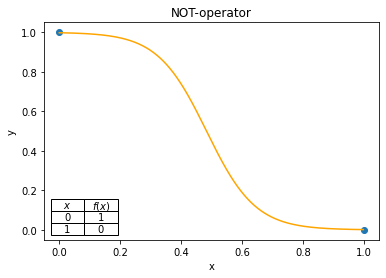

In [2]:
# We're making a model for the NOT operator, in which gives True if 0 and False if 1
import torch
import matplotlib.pyplot as plt

# Observed/training input and output. 0 = 1 and 1 = 0
x_train = torch.tensor([[0.0], [1.0]]).reshape(-1, 1)
y_train = torch.tensor([[1.0], [0.0]]).reshape(-1, 1)


class NOT_operator_model:
    def __init__(self):
        # Model variables
        # requires_grad enables calculation of gradients
        self.W = torch.tensor([[0.0]], requires_grad=True)
        self.b = torch.tensor([[0.0]], requires_grad=True)

    # Predictor
    def f(self, x):
        return torch.sigmoid(x @ self.W + self.b)

    # Logits
    def logits(self, x):
        return x @ self.W + self.b

    # Uses Cross Entropy
    def loss(self, x, y):
        return torch.nn.functional.binary_cross_entropy_with_logits(self.logits(x), y)


model = NOT_operator_model()

# Optimize: adjust W and b to minimize loss using stochastic gradient descent
optimizer = torch.optim.SGD([model.b, model.W], 0.1)
for epoch in range(25_000):
    model.loss(x_train, y_train).backward()  # Compute loss gradients
    optimizer.step()    # Perform optimization by adjusting W and b
    optimizer.zero_grad()  # Clear gradients for next step

print("W = %s, b = %s, loss = %s" %
      (model.W, model.b, model.loss(x_train, y_train)))

# Visualize result
plt.figure('Oppgave A')
plt.title('NOT-operator')
plt.table(cellText=[[0, 1], [1, 0]],
          colWidths=[0.1] * 3,
          colLabels=["$x$", "$f(x)$"],
          cellLoc="center",
          loc="lower left")
plt.scatter(x_train, y_train)
plt.xlabel('x')
plt.ylabel('y')
x = torch.arange(0.0, 1.0, 0.001).reshape(-1, 1)
y = model.f(x).detach()
plt.plot(x, y, color="orange")
plt.show()

W = tensor([[-9.8411],
        [-9.8411]], requires_grad=True), b = tensor([[14.8740]], requires_grad=True), loss = tensor(0.0053, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)


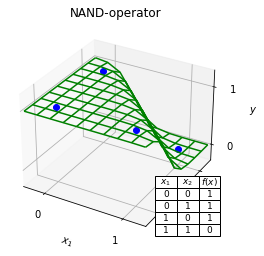

In [3]:
# We're making a model for the NAND operator
import torch
import matplotlib.pyplot as plt
import numpy as np

# Observed/training input and output.
x_train = torch.tensor(
    [[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]]).reshape(-1, 2)
y_train = torch.tensor([[1.0], [1.0], [1.0], [0.0]]).reshape(-1, 1)


class NAND_operator_model:
    def __init__(self):
        # Model variables
        # requires_grad enables calculation of gradients
        self.W = torch.tensor([[0.0], [0.0]], requires_grad=True)
        self.b = torch.tensor([[0.0]], requires_grad=True)

    # Predictor
    def f(self, x1, x2):
        return torch.sigmoid((x1 @ self.W[0]) + (x2 @ self.W[1]) + self.b)

    # Logits
    def logits(self, x1, x2):
        return ((x1 @ self.W[0]) + (x2 @ self.W[1]) + self.b).reshape(-1, 1)

    # Uses Cross Entropy

    def loss(self, x1, x2, y):
        return torch.nn.functional.binary_cross_entropy_with_logits(self.logits(x1, x2), y)


model = NAND_operator_model()

# Optimize: adjust W and b to minimize loss using stochastic gradient descent
optimizer = torch.optim.SGD([model.b, model.W, model.W], 0.1)
for epoch in range(25_000):
    model.loss(x_train[:, 0].reshape(-1, 1),
               x_train[:, 1].reshape(-1, 1),
               y_train).backward()  # Compute loss gradients
    optimizer.step()    # Perform optimization by adjusting W and b
    optimizer.zero_grad()  # Clear gradients for next step

print("W = %s, b = %s, loss = %s" %
      (model.W, model.b, model.loss(x_train[:, 0].reshape(-1, 1),
                                    x_train[:, 1].reshape(-1, 1),
                                    y_train)))

# Visualize result
fig = plt.figure('Oppgave B')
plot = fig.add_subplot(111, projection='3d')
plt.title('NAND-operator')

# Hva gjør denne plottinga? Aner ikke
x1_grid, x2_grid = np.meshgrid(
    np.linspace(-0.25, 1.25, 10), np.linspace(-0.25, 1.25, 10))
y_grid = np.empty([10, 10], dtype=np.double)
for i in range(0, x1_grid.shape[0]):
    for j in range(0, x1_grid.shape[1]):
        tenseX = torch.tensor(float(x1_grid[i, j])).reshape(-1, 1)
        tenseY = torch.tensor(float(x2_grid[i, j])).reshape(-1, 1)
        y_grid[i, j] = model.f(tenseX, tenseY)
plot_f = plot.plot_wireframe(x1_grid, x2_grid, y_grid, color="green")

plot.plot(x_train[:, 0].squeeze(),
          x_train[:, 1].squeeze(),
          y_train[:, 0].squeeze(),
          'o',
          color="blue")

plot.set_xlabel("$x_1$")
plot.set_ylabel("$x_2$")
plot.set_zlabel("$y$")
plot.set_xticks([0, 1])
plot.set_yticks([0, 1])
plot.set_zticks([0, 1])
plot.set_xlim(-0.25, 1.25)
plot.set_ylim(-0.25, 1.25)
plot.set_zlim(-0.25, 1.25)

table = plt.table(cellText=[[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 0]],
                  colWidths=[0.1] * 3,
                  colLabels=["$x_1$", "$x_2$", "$f(x)$"],
                  cellLoc="center",
                  loc="lower right")
plt.show()


W1 = tensor([[-8.6600, -8.4779],
        [ 8.4114,  8.7604]], requires_grad=True), W2 = tensor([[ 19.6341],
        [-19.1531]], requires_grad=True), b1 = tensor([[-4.3992,  4.2171]], requires_grad=True), b2 = tensor([[9.2831]], requires_grad=True), loss = 9.158688772004098e-05


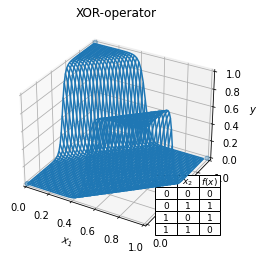

In [4]:
# We're making a model for the XOR operator
import torch
import matplotlib.pyplot as plt
import numpy as np
import random
from tabulate import tabulate
import matplotlib.cm as cm


class XOR_operator_model:
    def __init__(self):
        # Model variables
        # requires_grad enables calculation of gradients
        self.W1 = torch.tensor([[random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)],
                                [random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)]], requires_grad=True)
        self.W2 = torch.tensor(
            [[random.uniform(-1.0, 1.0)], [random.uniform(-1.0, 1.0)]], requires_grad=True)
        self.b1 = torch.tensor(
            [[random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)]], requires_grad=True)
        self.b2 = torch.tensor(
            [[random.uniform(-1.0, 1.0)]], requires_grad=True)

    # First layer function
    def f1(self, x):
        return torch.sigmoid(x @ self.W1 + self.b1)

    # Second layer function
    def f2(self, h):
        return torch.sigmoid(h @ self.W2 + self.b2)

    # Predictor
    def f(self, x):
        return self.f2(self.f1(x))

    # Uses Cross Entropy
    def loss(self, x, y):
        return torch.nn.functional.binary_cross_entropy(self.f(x), y)


model = XOR_operator_model()

# Observed/training input and output.
x_train = torch.tensor(
    [[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]]).reshape(-1, 2)
y_train = torch.tensor([[0.0], [1.0], [1.0], [0.0]]).reshape(-1, 1)

"""--------------- Optimization ----------------"""
epoch = 100_000
learning_rate = 1

# Optimize: adjust W and b to minimize loss using stochastic gradient descent
optimizer = torch.optim.SGD(
    [model.b1, model.b2, model.W1, model.W2], lr=learning_rate)
for epoch in range(epoch):
    model.loss(x_train, y_train).backward()  # Compute loss gradients
    optimizer.step()    # Perform optimization by adjusting W and b
    optimizer.zero_grad()  # Clear gradients for next step

print(f'W1 = {model.W1}, W2 = {model.W2}, b1 = {model.b1}, b2 = {model.b2}, loss = {model.loss(x_train.reshape(-1, 2), y_train)}')

"""--------------- Visualize ----------------"""

# Visualize result
fig = plt.figure('Oppgave C')
ax = fig.gca(projection='3d')
plt.title('XOR-operator')
# set axes limits, labels and create a table of the XOR
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
plt.table(cellText=[[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0]],
          colWidths=[0.1] * 3,
          colLabels=["$x_1$", "$x_2$", "$f(x)$"],
          cellLoc="center",
          loc="lower right")


x1 = np.arange(0, 1, 0.02)  # Set x1-values on the grid
x2 = np.arange(0, 1, 0.02)  # Set x2-values on the grid
# Calculate y-axis values
y = np.empty([len(x1), len(x2)], dtype=np.double)
for t in range(len(x1)):
    for r in range(len(x2)):
        y[t, r] = float(model.f(torch.tensor([float(x1[t]), float(x2[r])])))

x1, x2 = np.meshgrid(x1, x2)  # Create meshgrid
surf = ax.plot_wireframe(x1, x2, np.array(y))  # Plots the wireframe

# Scatter/plot the points for f(x1, x2) in x_train
xer = [float(x[0]) for x in x_train]
yer = [float(x[1]) for x in x_train]
ax.scatter(xer, yer, y_train)

float(model.f(torch.tensor([1.0, 0.0])))

""" # Customize the view angle so it's easier to see that the scatter points lie
# on the plane y=0
ax.view_init(elev=0, azim=-180) """

plt.show()


epoch = 100, loss = 0.6734575629234314, accuracy = 82.28999972343445%
epoch = 200, loss = 0.6661462783813477, accuracy = 89.37000036239624%
epoch = 300, loss = 0.6646565794944763, accuracy = 90.53999781608582%
epoch = 400, loss = 0.6641817688941956, accuracy = 91.07000231742859%
epoch = 500, loss = 0.6639130115509033, accuracy = 91.1899983882904%
epoch = 600, loss = 0.6637041568756104, accuracy = 91.25000238418579%
epoch = 700, loss = 0.6632248163223267, accuracy = 91.6700005531311%
epoch = 800, loss = 0.6629525423049927, accuracy = 92.00000166893005%
epoch = 900, loss = 0.6628511548042297, accuracy = 91.71000123023987%
epoch = 1000, loss = 0.6633726358413696, accuracy = 91.53000116348267%
  epoch      loss    accuracy
-------  --------  ----------
    100  0.673458       82.29
    200  0.666146       89.37
    300  0.664657       90.54
    400  0.664182       91.07
    500  0.663913       91.19
    600  0.663704       91.25
    700  0.663225       91.67
    800  0.662953       92
    

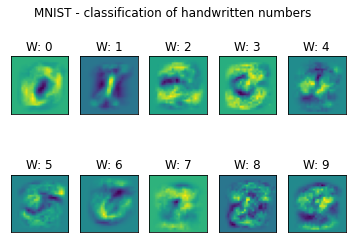

In [5]:
import torch
import torchvision
import matplotlib.pyplot as plt
import tabulate

# Using the MNIST-dataset for loading handwritten numbers. Divides it into two sets, one for training and one for testing. Used https://gitlab.com/ntnu-tdat3025/ann/mnist/-/blob/master/main.py for loading, but removed './data' in MNIST as '' is enough.
mnist_train = torchvision.datasets.MNIST('', train=True, download=True)
x_train = mnist_train.data.reshape(-1, 784).float()  # Reshape input
# Create output tensor
y_train = torch.zeros((mnist_train.targets.shape[0], 10))
y_train[torch.arange(mnist_train.targets.shape[0]),
        mnist_train.targets] = 1  # Populate output

mnist_test = torchvision.datasets.MNIST('', train=False, download=True)
x_test = mnist_test.data.reshape(-1, 784).float()  # Reshape input
# Create output tensor
y_test = torch.zeros((mnist_test.targets.shape[0], 10))  
y_test[torch.arange(mnist_test.targets.shape[0]),
       mnist_test.targets] = 1  # Populate output


class handwritingClassification_model:
    def __init__(self):
        # Initializes with 784 rows of 10 ones
        self.W = torch.ones([784, 10], requires_grad=True)
        # Initializes with 1 row of 10 ones
        self.b = torch.ones([1, 10], requires_grad=True)

    # Predictor
    def f(self, x):
        # Have to set dim=1 as I got a warning. Implicit dim is deprecated
        return torch.nn.functional.softmax(x @ self.W + self.b, dim=1)

    # Uses Cross Entropy
    def loss(self, x, y):
        return torch.nn.functional.binary_cross_entropy_with_logits(self.f(x), y)

    def accuracy(self, x, y):
        return torch.mean(torch.eq(self.f(x).argmax(1), y.argmax(1)).float())


model = handwritingClassification_model()

"""------------------ optimize ------------------"""
learning_rate = 1
epoch = 1000

optimizer = torch.optim.SGD([model.W, model.b], lr=learning_rate)
results = []
for index, epoch in enumerate(range(epoch)):
    if (index+1) % 100 == 0:
        print(f'epoch = {index+1}, loss = {model.loss(x_train, y_train).item()}, accuracy = {model.accuracy(x_test, y_test).item() * 100}%')
        results.append([index+1, model.loss(x_train, y_train).item(),
                        model.accuracy(x_test, y_test).item() * 100])

    model.loss(x_train, y_train).backward()  # Compute loss gradients
    optimizer.step()  # Perform optimization by adjusting W and b
    optimizer.zero_grad()  # Clear gradients for next step

print(tabulate.tabulate(results, headers=['epoch', 'loss', 'accuracy']))

"""------------------ visualize ------------------"""
fig = plt.figure('Oppgave D')
fig.suptitle('MNIST - classification of handwritten numbers')
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(model.W[:, i].detach().numpy().reshape(28, 28))
    plt.title(f'W: {i}')
    plt.xticks([])
    plt.yticks([])

plt.show()
